# Bow Image Classification | DenseNet121

### *Course Project - Deep Learning*
#### `Part 3B | Fine Tuning`

**Author:** Sarang Galada<br>
**School:** School of Computing & Data Science, Sai University<br>
**Email ID:** sarang.g-25@scds.saiuniversity.edu.in<br>
**Date created:** 26/12/2023<br><br>
**Description:** Classification of Bow (weapon) images into 5 types using Transfer Learning and Fine Tuning

*   *Problem*: `Image Classification`
*   *Dataset*: `Bow Images`
*   *Model*: `DenseNet121`
*   *Key library used*: `TensorFlow Keras`

## Downloading the model and datasets

In [ ]:
# Import required libraries

import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

2.15.0


In [ ]:
# Mount the Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Since the model and datasets are already prepared, load them directly from Drive

X_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_train.npy')
X_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/X_test.npy')
y_train = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_train.npy')
y_test = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/y_test.npy')

print(f"No. of training samples: {X_train.shape[0]}")
print(f"No. of testing samples: {X_test.shape[0]}")

No. of training samples: 607
No. of testing samples: 203


In [ ]:
labels = np.load('/content/gdrive/MyDrive/Models/BowImageClassification/labels.npy')
print(labels)

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [ ]:
# Load the Transfer Learning model based on DenseNet121

model3_FT = keras.models.load_model('/content/gdrive/MyDrive/Models/BowImageClassification/DenseNet121_TransferLearning_BestModel.h5')
model3_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, None, None, 3)        0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

## Fine Tuning the model
In this Fine Tuning experiment, we set all the layers of the Feature Extractor as trainable so that they are updated during backpropagation

In [ ]:
for layer in model3_FT.layers:
    layer.trainable = True

## Compiling and training the model

In [ ]:
model3_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_FT = [keras.callbacks.ModelCheckpoint("bestFT.h5",
                                                monitor='val_accuracy',
                                                save_weights_only=True,
                                                save_best_only=True)]

history_FT = model3_FT.fit(x = X_train, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=16, callbacks=callbacks_FT)

Epoch 1/10
35/35 [==============================] - 64s 279ms/step - loss: 0.3987 - accuracy: 0.8773 - val_loss: 233.8479 - val_accuracy: 0.5574
Epoch 2/10
35/35 [==============================] - 7s 202ms/step - loss: 0.3738 - accuracy: 0.8608 - val_loss: 13.0263 - val_accuracy: 0.6557
Epoch 3/10
35/35 [==============================] - 7s 189ms/step - loss: 0.2582 - accuracy: 0.9194 - val_loss: 7.3991 - val_accuracy: 0.1311
Epoch 4/10
35/35 [==============================] - 7s 202ms/step - loss: 0.2166 - accuracy: 0.9249 - val_loss: 0.5268 - val_accuracy: 0.8689
Epoch 5/10
35/35 [==============================] - 6s 183ms/step - loss: 0.1995 - accuracy: 0.9322 - val_loss: 0.3749 - val_accuracy: 0.8689
Epoch 6/10
35/35 [==============================] - 7s 189ms/step - loss: 0.1719 - accuracy: 0.9322 - val_loss: 1.4395 - val_accuracy: 0.7705
Epoch 7/10
35/35 [==============================] - 6s 182ms/step - loss: 0.2022 - accuracy: 0.9231 - val_loss: 1.8825 - val_accuracy: 0.8197
Ep

## Visualising the model's training accuracy

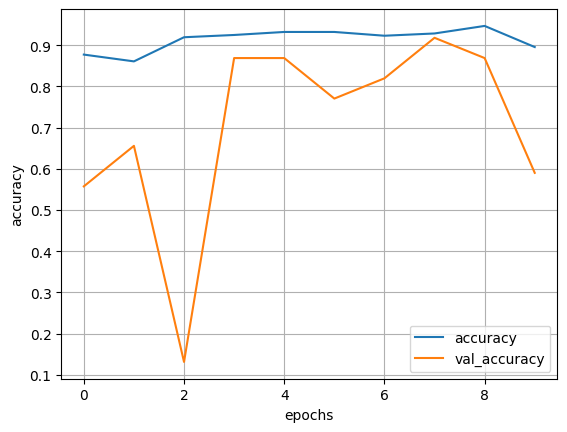

In [ ]:
progress = {k:v for k,v in history_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

## Evaluating the model

In [ ]:
# Loading the model's best weights during training
model3_FT.load_weights("bestFT.h5")

# Test loss and test accuracy
testLoss_FT, testAccuracy_FT = model3_FT.evaluate(x = X_test, y = y_test, batch_size=16)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

13/13 [==============================] - 1s 56ms/step - loss: 0.6845 - accuracy: 0.8079
Test-loss: 0.684483, Test-accuracy: 0.807882


In [ ]:
# Making predictions on the test set

y_proba = model3_FT.predict(X_test)
y_pred = np.argmax(y_proba, axis=-1)
print(y_pred)

7/7 [==============================] - 6s 75ms/step
[4 0 4 4 0 0 0 0 4 4 0 0 1 0 0 0 4 1 0 1 0 4 0 0 0 4 0 0 0 1 4 1 4 0 0 1 1
 4 4 4 4 4 1 0 1 0 1 0 0 1 4 0 4 0 0 2 4 4 3 0 0 0 0 4 0 0 3 4 0 4 0 1 1 2
 0 0 0 0 0 0 4 4 4 0 0 3 4 4 4 0 4 0 1 4 4 4 4 0 1 4 1 4 0 4 0 0 1 4 0 0 4
 0 4 0 4 1 0 1 1 1 1 0 4 4 0 0 0 4 0 0 4 0 4 0 0 4 1 1 2 3 4 0 2 0 4 0 4 3
 0 2 2 4 4 4 0 1 4 0 0 0 4 4 0 4 0 4 0 4 0 4 0 1 4 4 0 4 3 4 0 0 1 0 0 4 4
 3 3 0 2 0 0 1 1 4 4 0 0 0 4 2 3 1 0]


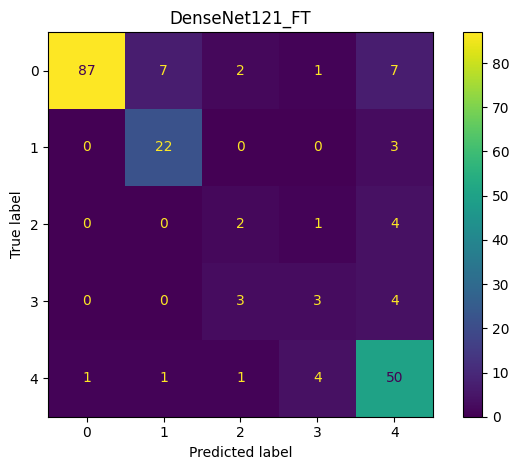

['Compound Bow' 'Crossbow' 'Kyudo Bow' 'Longbow' 'Traditional Recurve Bow']


In [ ]:
# Confusion Matrix of the model's predictions on the test data

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
cm.plot()
plt.title("DenseNet121_FT")
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfMat_DenseNet121_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

print(labels)

In [ ]:
# Classification report

from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       104
           1       0.73      0.88      0.80        25
           2       0.25      0.29      0.27         7
           3       0.33      0.30      0.32        10
           4       0.74      0.88      0.80        57

    accuracy                           0.81       203
   macro avg       0.61      0.64      0.62       203
weighted avg       0.83      0.81      0.81       203



## Save the model

In [ ]:
# Save the best performing Fine-tuned model
model3_FT.save('/content/gdrive/MyDrive/Models/BowImageClassification/DenseNet121_FineTuning_BestModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
